In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import os


from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report,roc_auc_score,roc_curve,confusion_matrix

In [2]:
df=pd.read_csv('../data/hotel_bookings.csv')
df.shape
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df["is_canceled"].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [4]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [5]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=["number"])

#number of numerical features
num_numerical_features = numerical_columns.shape[1]

#name of numerical features
numerical_feature_names = numerical_columns.columns.tolist()

print("Number of numerical features:", num_numerical_features)
print("Numerical feature names:", numerical_feature_names)


Number of numerical features: 20
Numerical feature names: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [6]:
# Define numerical features
numerical_features=[
    'lead_time', 'arrival_date_year', 
    'arrival_date_week_number', 'arrival_date_day_of_month', 
    'stays_in_weekend_nights', 'stays_in_week_nights', 
    'adults', 'children', 'babies', 'is_repeated_guest',
      'previous_cancellations', 'previous_bookings_not_canceled', 
      'booking_changes', 'agent', 'company', 'days_in_waiting_list', 
      'adr', 'required_car_parking_spaces', 'total_of_special_requests'
]

In [7]:
# Correlation of numeric features with the target
corr = df[numerical_features + ['is_canceled']].corr()['is_canceled'] \
    .drop('is_canceled') \
    .sort_values(ascending=False)

print("Correlation with target (is_canceled):")
print(corr)


Correlation with target (is_canceled):
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64


Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

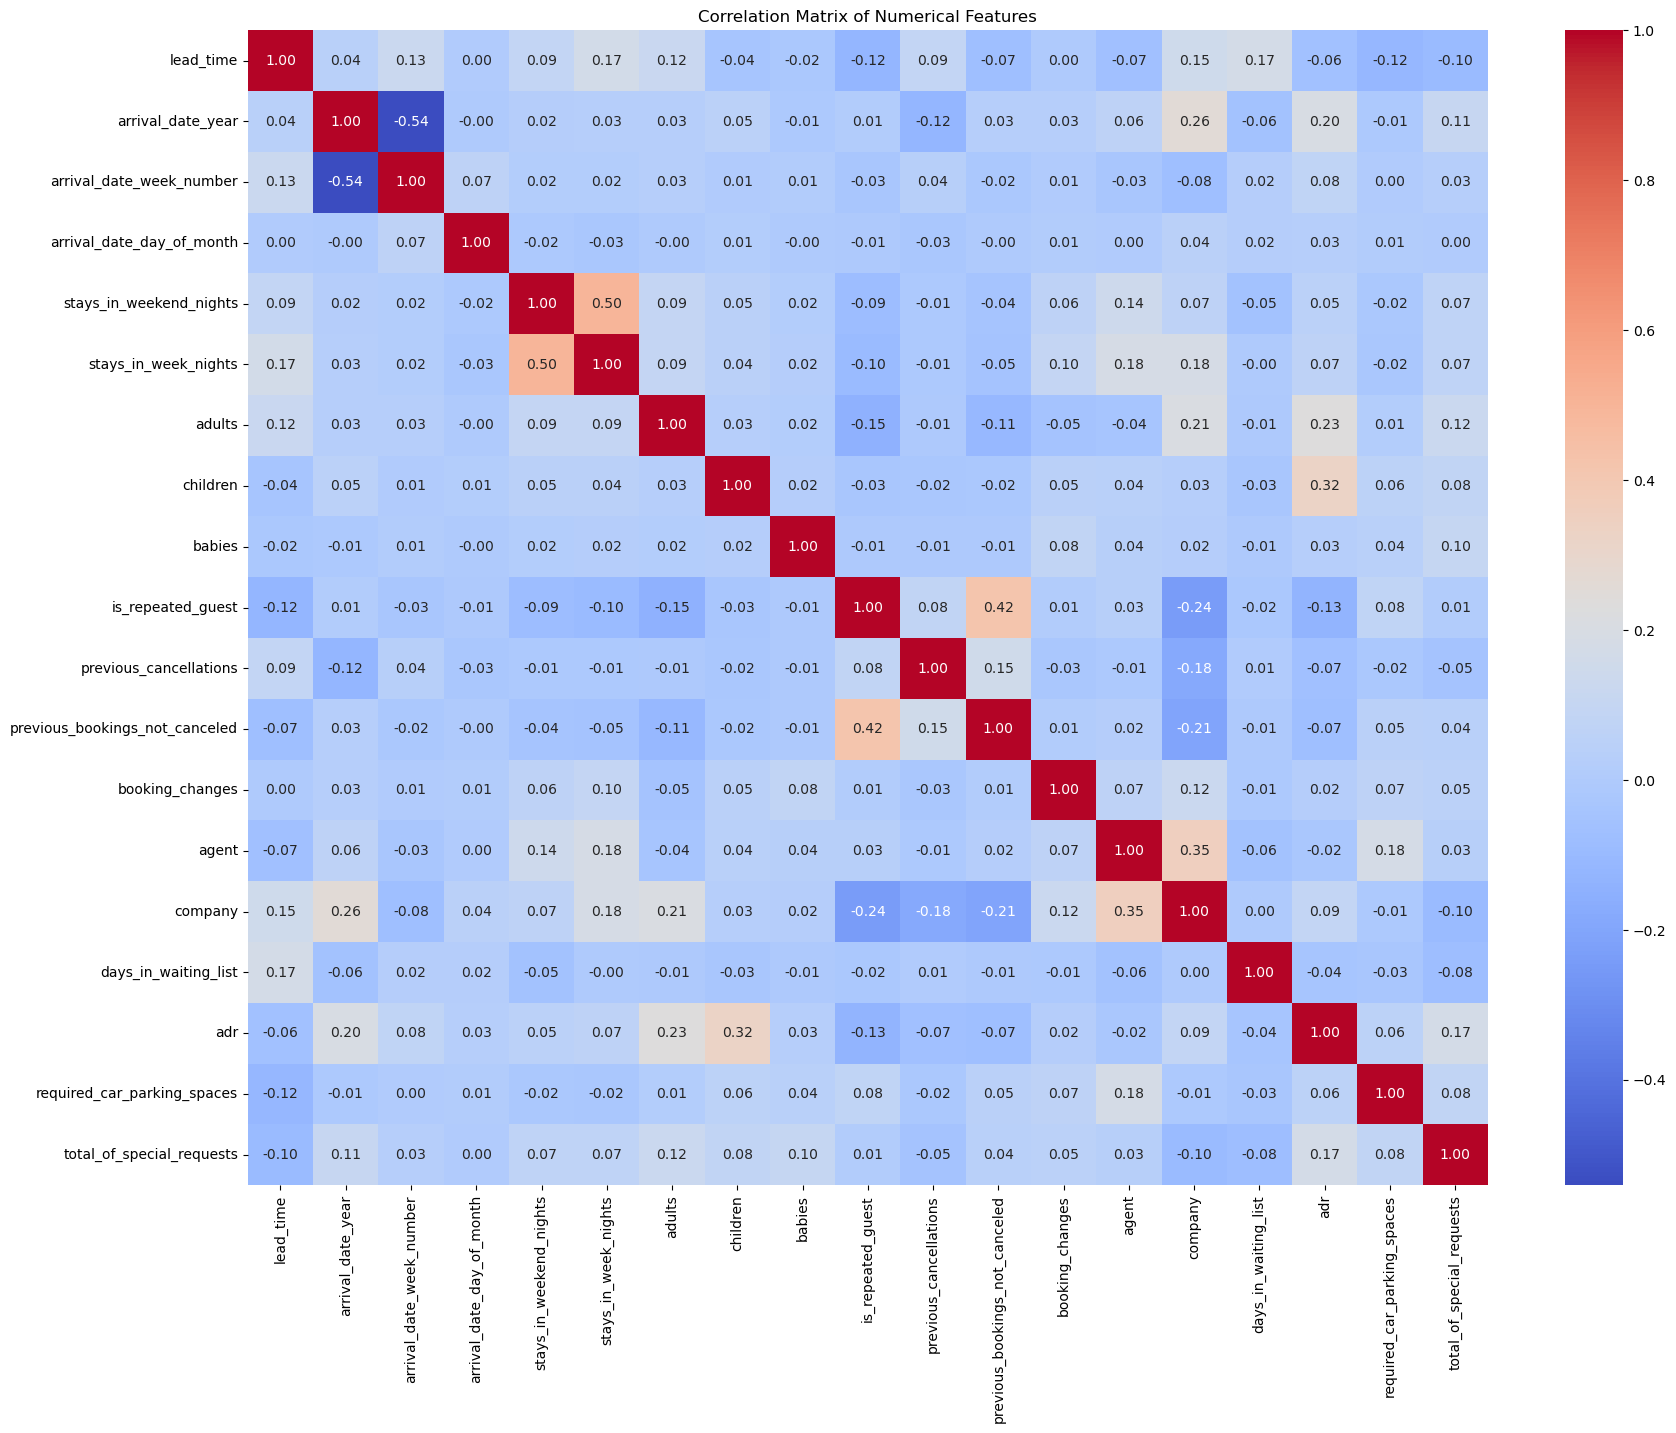

In [8]:
#visualize correlation
plt.figure(figsize=(20, 15))
sns.heatmap(df[numerical_features].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")

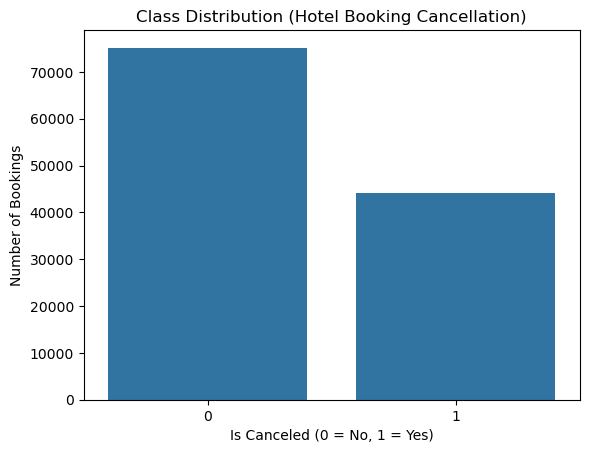

In [9]:
#class distribution
sns.countplot(x='is_canceled', data=df)
plt.title("Class Distribution (Hotel Booking Cancellation)")
plt.xlabel("Is Canceled (0 = No, 1 = Yes)")
plt.ylabel("Number of Bookings")
plt.show()


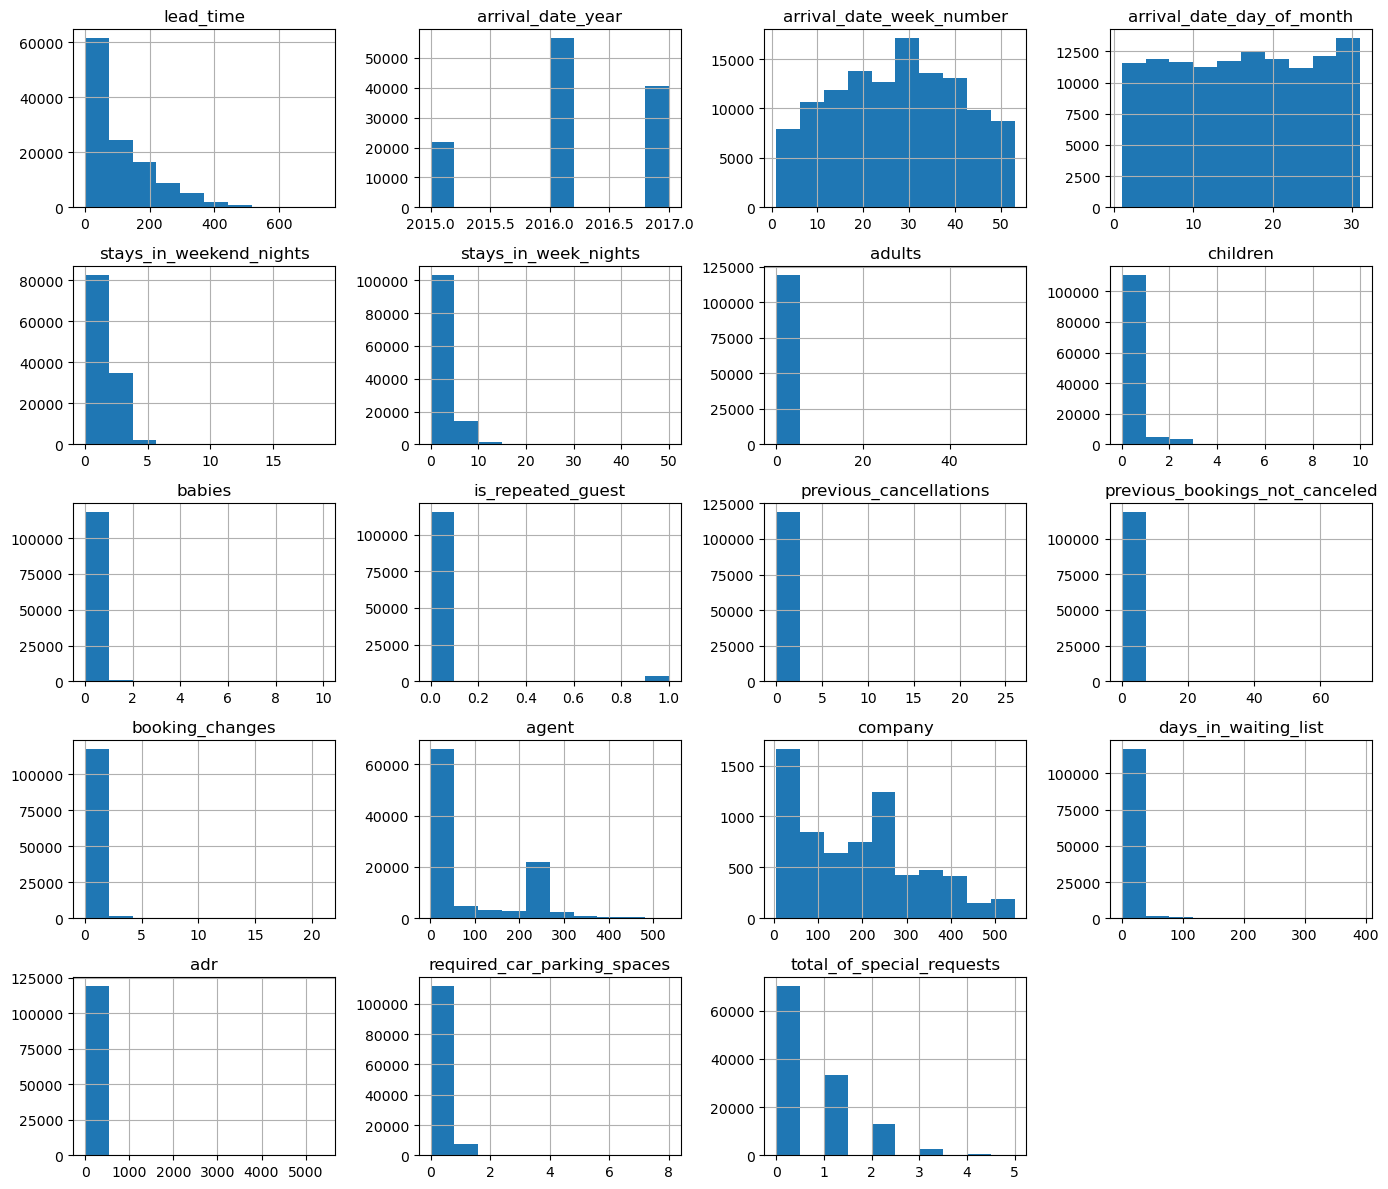

In [10]:
# Plot histograms for numerical features
df[numerical_features].hist(figsize=(14,12))
plt.tight_layout()
plt.show()

Droping the catogorical columns,reservation_status and reservation_status_date,as they provide the target column output

In [11]:
df.drop(columns=['reservation_status', 'reservation_status_date'],axis=1, inplace=True)

In [12]:
#converting month column to numerical values
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

df[['arrival_date_month']].head()

,arrival_date_month
0,7
1,7
2,7
3,7
4,7


In [13]:
#handling missing values
df['children']=df['children'].fillna(df['children'].median(),)
df['country']=df['country'].fillna(df['country'].mode()[0])

In [14]:
df['agent']=df['agent'].fillna(0)
df['company']=df['company'].fillna(0)

In [15]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

Featured Engineering

In [16]:
df['total_stays']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
df['total_guests']=df['adults']+df['children']+df['babies']
df['has_children']=(df['children']+df['babies']>0).astype(int)


In [17]:
df['lead_time_category']=pd.cut(
    df['lead_time'],
    bins=[-1,7,30,90,180,365,1000],
    labels=['very_short','short','medium','long','very_long','extremely_long'])

In [18]:
df['is_weekend_stay']=(df['stays_in_weekend_nights']>0).astype(int)
df['booking_changed_flag']=(df['booking_changes']>0).astype(int)

In [19]:
#compare the model performance before and after dropping these columns
df=df.drop(
    ['stays_in_weekend_nights',
     'stays_in_week_nights',
     'adults','children',
     'babies','lead_time'],
     axis=1
     )

In [20]:
#separating features and target variable
X=df.drop('is_canceled',axis=1)
y=df['is_canceled']

Encoding categorical Variable

In [21]:
catagorical_features = X.select_dtypes(include=["object", "category"]).columns
print(catagorical_features)

Index(['hotel', 'meal', 'country', 'market_segment', 'distribution_channel',
       'reserved_room_type', 'assigned_room_type', 'deposit_type',
       'customer_type', 'lead_time_category'],
      dtype='object')


In [22]:
#one hot encoding of categorical features
x_encoded=pd.get_dummies(X,columns=catagorical_features,drop_first=True).astype(int)
x_encoded.head()

,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,lead_time_category_short,lead_time_category_medium,lead_time_category_long,lead_time_category_very_long,lead_time_category_extremely_long
0,2015,7,27,1,0,0,0,3,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2015,7,27,1,0,0,0,4,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2015,7,27,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2015,7,27,1,0,0,0,0,304,0,...,0,0,0,1,0,1,0,0,0,0
4,2015,7,27,1,0,0,0,0,240,0,...,0,0,0,1,0,1,0,0,0,0


In [23]:
print(x_encoded.shape)
print(y.shape)

(119390, 241)
(119390,)


In [24]:
x_encoded.describe()

,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,lead_time_category_short,lead_time_category_medium,lead_time_category_long,lead_time_category_very_long,lead_time_category_extremely_long
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,2016.156554,6.552483,27.165173,15.798241,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,...,0.122179,0.001357,0.004833,0.750591,0.210436,0.158807,0.247533,0.221451,0.180451,0.026367
std,0.707476,3.090619,13.605138,8.780829,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,...,0.327494,0.036811,0.069351,0.432673,0.407620,0.365498,0.431581,0.415225,0.384564,0.160226
min,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,4.000000,16.000000,8.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.000000,7.000000,28.000000,16.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2017.000000,9.000000,38.000000,23.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2017.000000,12.000000,53.000000,31.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


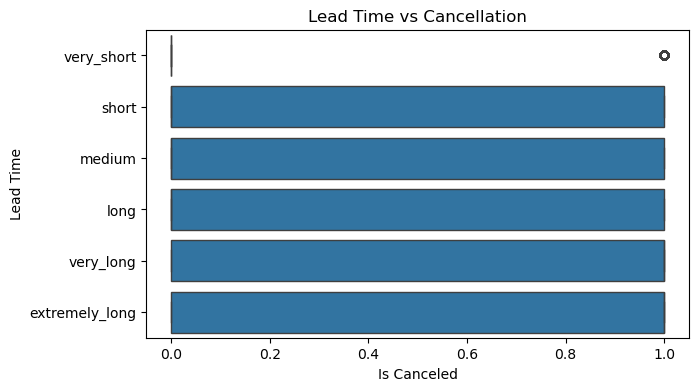

In [27]:
plt.figure(figsize=(7,4))
sns.boxplot(x=y, y=df['lead_time_category'])
plt.title("Lead Time vs Cancellation")
plt.xlabel("Is Canceled")
plt.ylabel("Lead Time")
plt.show()


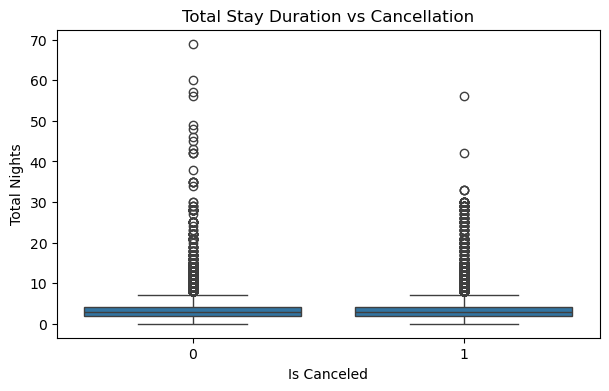

In [28]:
plt.figure(figsize=(7,4))
sns.boxplot(x=y, y=df['total_stays'])
plt.title("Total Stay Duration vs Cancellation")
plt.xlabel("Is Canceled")
plt.ylabel("Total Nights")
plt.show()


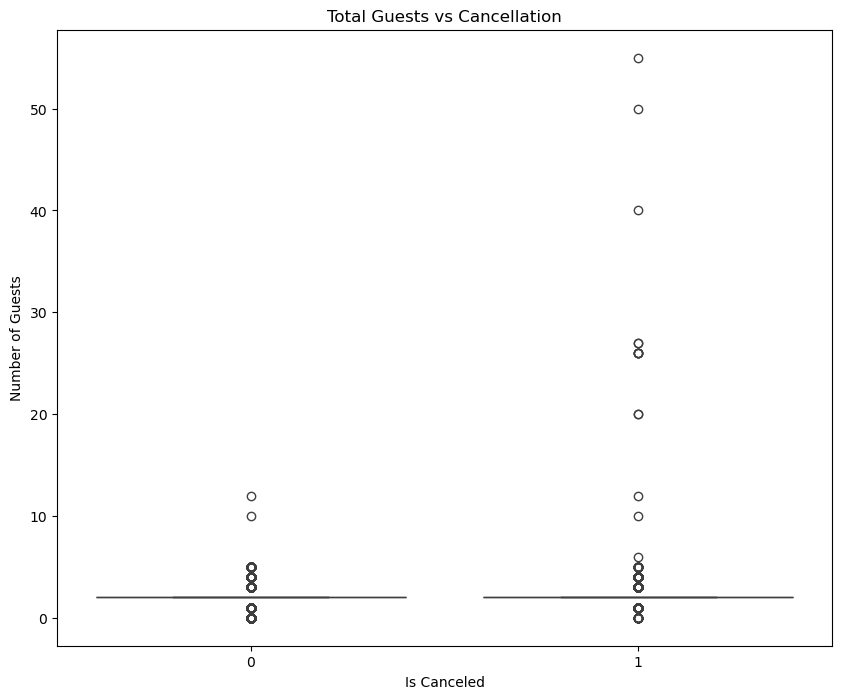

In [29]:
plt.figure(figsize=(10,8))
sns.boxplot(x=y, y=df['total_guests'])
plt.title("Total Guests vs Cancellation")
plt.xlabel("Is Canceled")
plt.ylabel("Number of Guests")
plt.show()


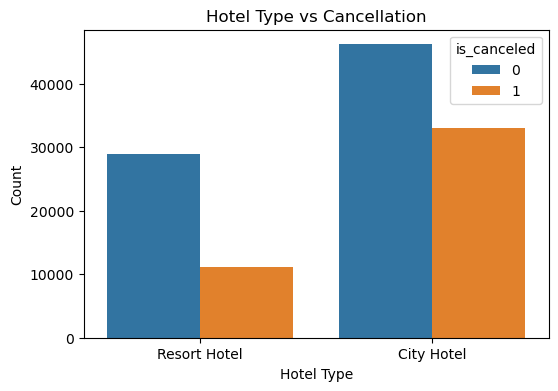

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title("Hotel Type vs Cancellation")
plt.xlabel("Hotel Type")
plt.ylabel("Count")
plt.show()


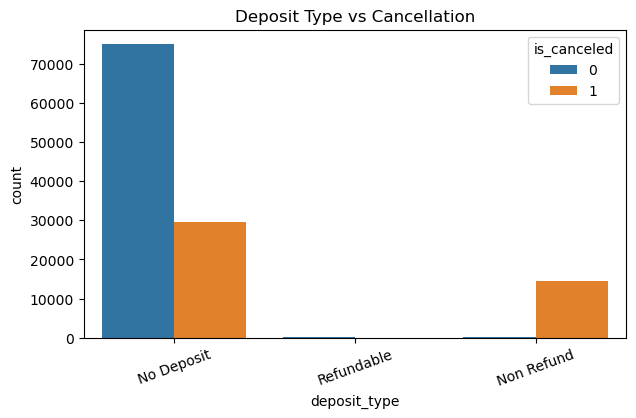

In [31]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.title("Deposit Type vs Cancellation")
plt.xticks(rotation=20)
plt.show()


Train\Test Split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(
    x_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [33]:
print('Training set shape:', X_train.shape,'Test set shape:', X_test.shape)
print('Train Class balance:\n', y_train.value_counts(normalize=True))
print('Test Class balance:\n', y_test.value_counts(normalize=True))

Training set shape: (95512, 241) Test set shape: (23878, 241)
Train Class balance:
 is_canceled
0    0.629586
1    0.370414
Name: proportion, dtype: float64
Test Class balance:
 is_canceled
0    0.629575
1    0.370425
Name: proportion, dtype: float64


In [34]:
#Baseline model: Decision Tree Classifier
dt_hotels=DecisionTreeClassifier(random_state=42)
dt_hotels.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
#predictions
y_train_pred=dt_hotels.predict(X_train)
y_test_pred=dt_hotels.predict(X_test)

#Accuracy Scores
train_accuracy=accuracy_score(y_train,y_train_pred)
test_accuracy=accuracy_score(y_test,y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9957
Test Accuracy: 0.8552


In [36]:
#Classification Report(test set)
print("Classification Report (Test Set):")
print(classification_report(y_test,y_test_pred,zero_division=0))

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.88      0.88     15033
           1       0.80      0.81      0.81      8845

    accuracy                           0.86     23878
   macro avg       0.84      0.85      0.85     23878
weighted avg       0.86      0.86      0.86     23878



In [37]:
print("Baseline Training Accuracy:", dt_hotels.score(X_train, y_train))
print("Baseline Test Accuracy:", dt_hotels.score(X_test, y_test))

print("Baseline Tree Depth:", dt_hotels.get_depth())
print("Baseline Number of Leaves:", dt_hotels.get_n_leaves())

Baseline Training Accuracy: 0.9956864058966413
Baseline Test Accuracy: 0.8552223804338722
Baseline Tree Depth: 47
Baseline Number of Leaves: 11267


In [38]:
dt_1=DecisionTreeClassifier(random_state=42)
path=dt_1.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas=path.ccp_alphas
impurities=path.impurities

print('Number of effective alphas:', len(ccp_alphas))

Number of effective alphas: 5126


In [39]:
#Remove the number of alphas for pruning 
ccp_alphas_r = ccp_alphas[::50]

print('Reduced number of alphas for pruning:', len(ccp_alphas_r))

Reduced number of alphas for pruning: 103


In [40]:
train_accuracys = []
test_accuracys = []

for ccp_alpha in ccp_alphas_r:
    dt_1=DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    dt_1.fit(X_train,y_train)

    train_accuracys.append(dt_1.score(X_train, y_train))
    test_accuracys.append(dt_1.score(X_test, y_test))

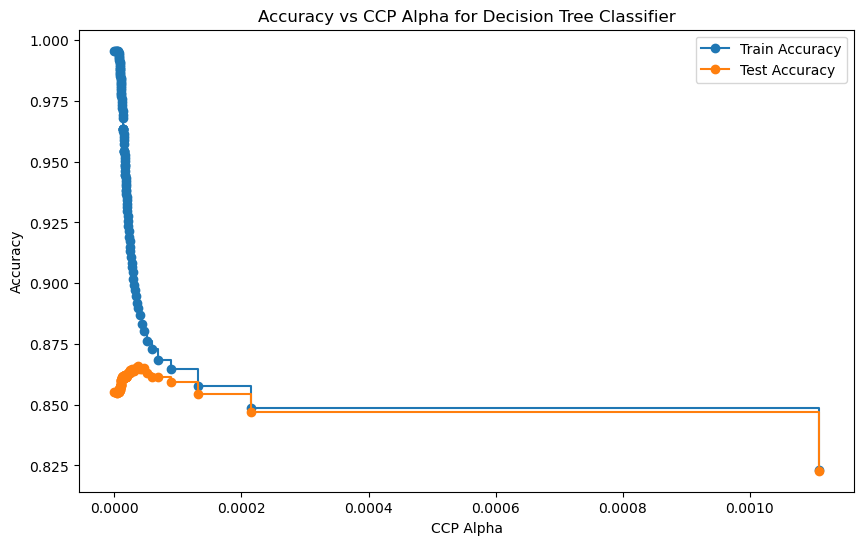

In [41]:
#Accuracy vs alpha plot
plt.figure(figsize=(10,6))
plt.plot(ccp_alphas_r, train_accuracys, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas_r, test_accuracys, marker='o', label='Test Accuracy', drawstyle="steps-post")
plt.xlabel('CCP Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs CCP Alpha for Decision Tree Classifier')
plt.legend()
plt.show()

In [42]:
#select optimal alpha
best_index =test_accuracys.index(max(test_accuracys))
best_alpha=ccp_alphas_r[best_index]

print('Optimal CCP Alpha:' ,best_alpha)
print('Best Test Accuracy:', test_accuracys[best_index])

Optimal CCP Alpha: 3.751034873511228e-05
Best Test Accuracy: 0.8660273054694698


In [43]:
#Train final model with optimal alpha
final_dt=DecisionTreeClassifier(
    random_state=42,ccp_alpha=best_alpha
    )
final_dt.fit(X_train,y_train)

#Evaluate final model
y_test_pred=final_dt.predict(X_test)
final_train_accuracy=accuracy_score(y_train,final_dt.predict(X_train))
final_test_accuracy=accuracy_score(y_test,y_test_pred)

print(f"Final Training Accuracy with optimal CCP Alpha: {final_train_accuracy:.4f}")
print(f"Final Test Accuracy with optimal CCP Alpha: {final_test_accuracy:.4f}")
print('\nfinal Classification Report (Test Set):')
print(classification_report(y_test,y_test_pred,zero_division=0))

Final Training Accuracy with optimal CCP Alpha: 0.8897
Final Test Accuracy with optimal CCP Alpha: 0.8660

final Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     15033
           1       0.83      0.80      0.82      8845

    accuracy                           0.87     23878
   macro avg       0.86      0.85      0.86     23878
weighted avg       0.87      0.87      0.87     23878



In [44]:

print("Final Tree Depth:", final_dt.get_depth())
print("Final Number of Leaves:", final_dt.get_n_leaves())

Final Tree Depth: 26
Final Number of Leaves: 822


Text(0.5, 36.72222222222221, 'Predicted Label')

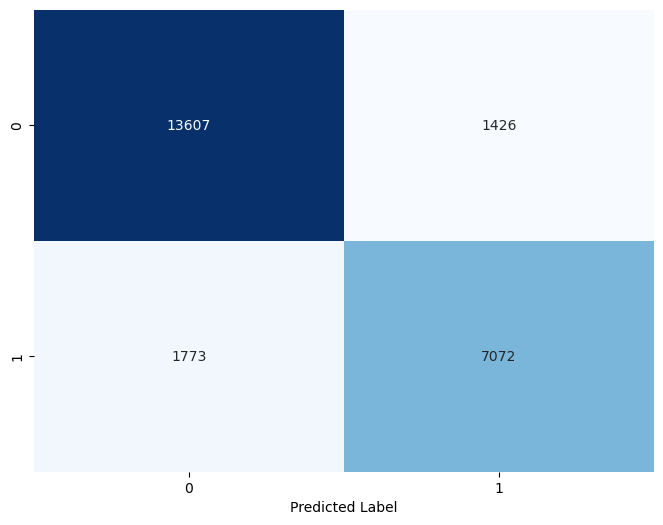

In [45]:
#final Tree classification metrics visualization
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")   

In [46]:

# Feature importance

feature_importance = pd.Series(
    final_dt.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Show top 10 important features
print("Top 10 most important features:")
print(feature_importance.head(10))

Top 10 most important features:
deposit_type_Non Refund        0.355533
country_PRT                    0.098224
total_of_special_requests      0.069163
agent                          0.053318
market_segment_Online TA       0.045628
total_stays                    0.038672
previous_cancellations         0.036634
required_car_parking_spaces    0.034979
arrival_date_year              0.034909
adr                            0.031175
dtype: float64


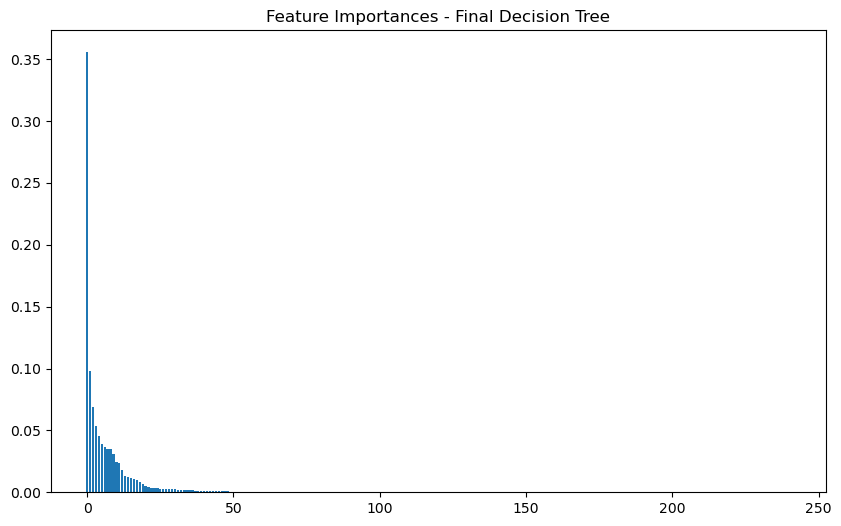

In [47]:
#final tree bar chart of feature importances
importances = final_dt.feature_importances_ 
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importances - Final Decision Tree")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.show()

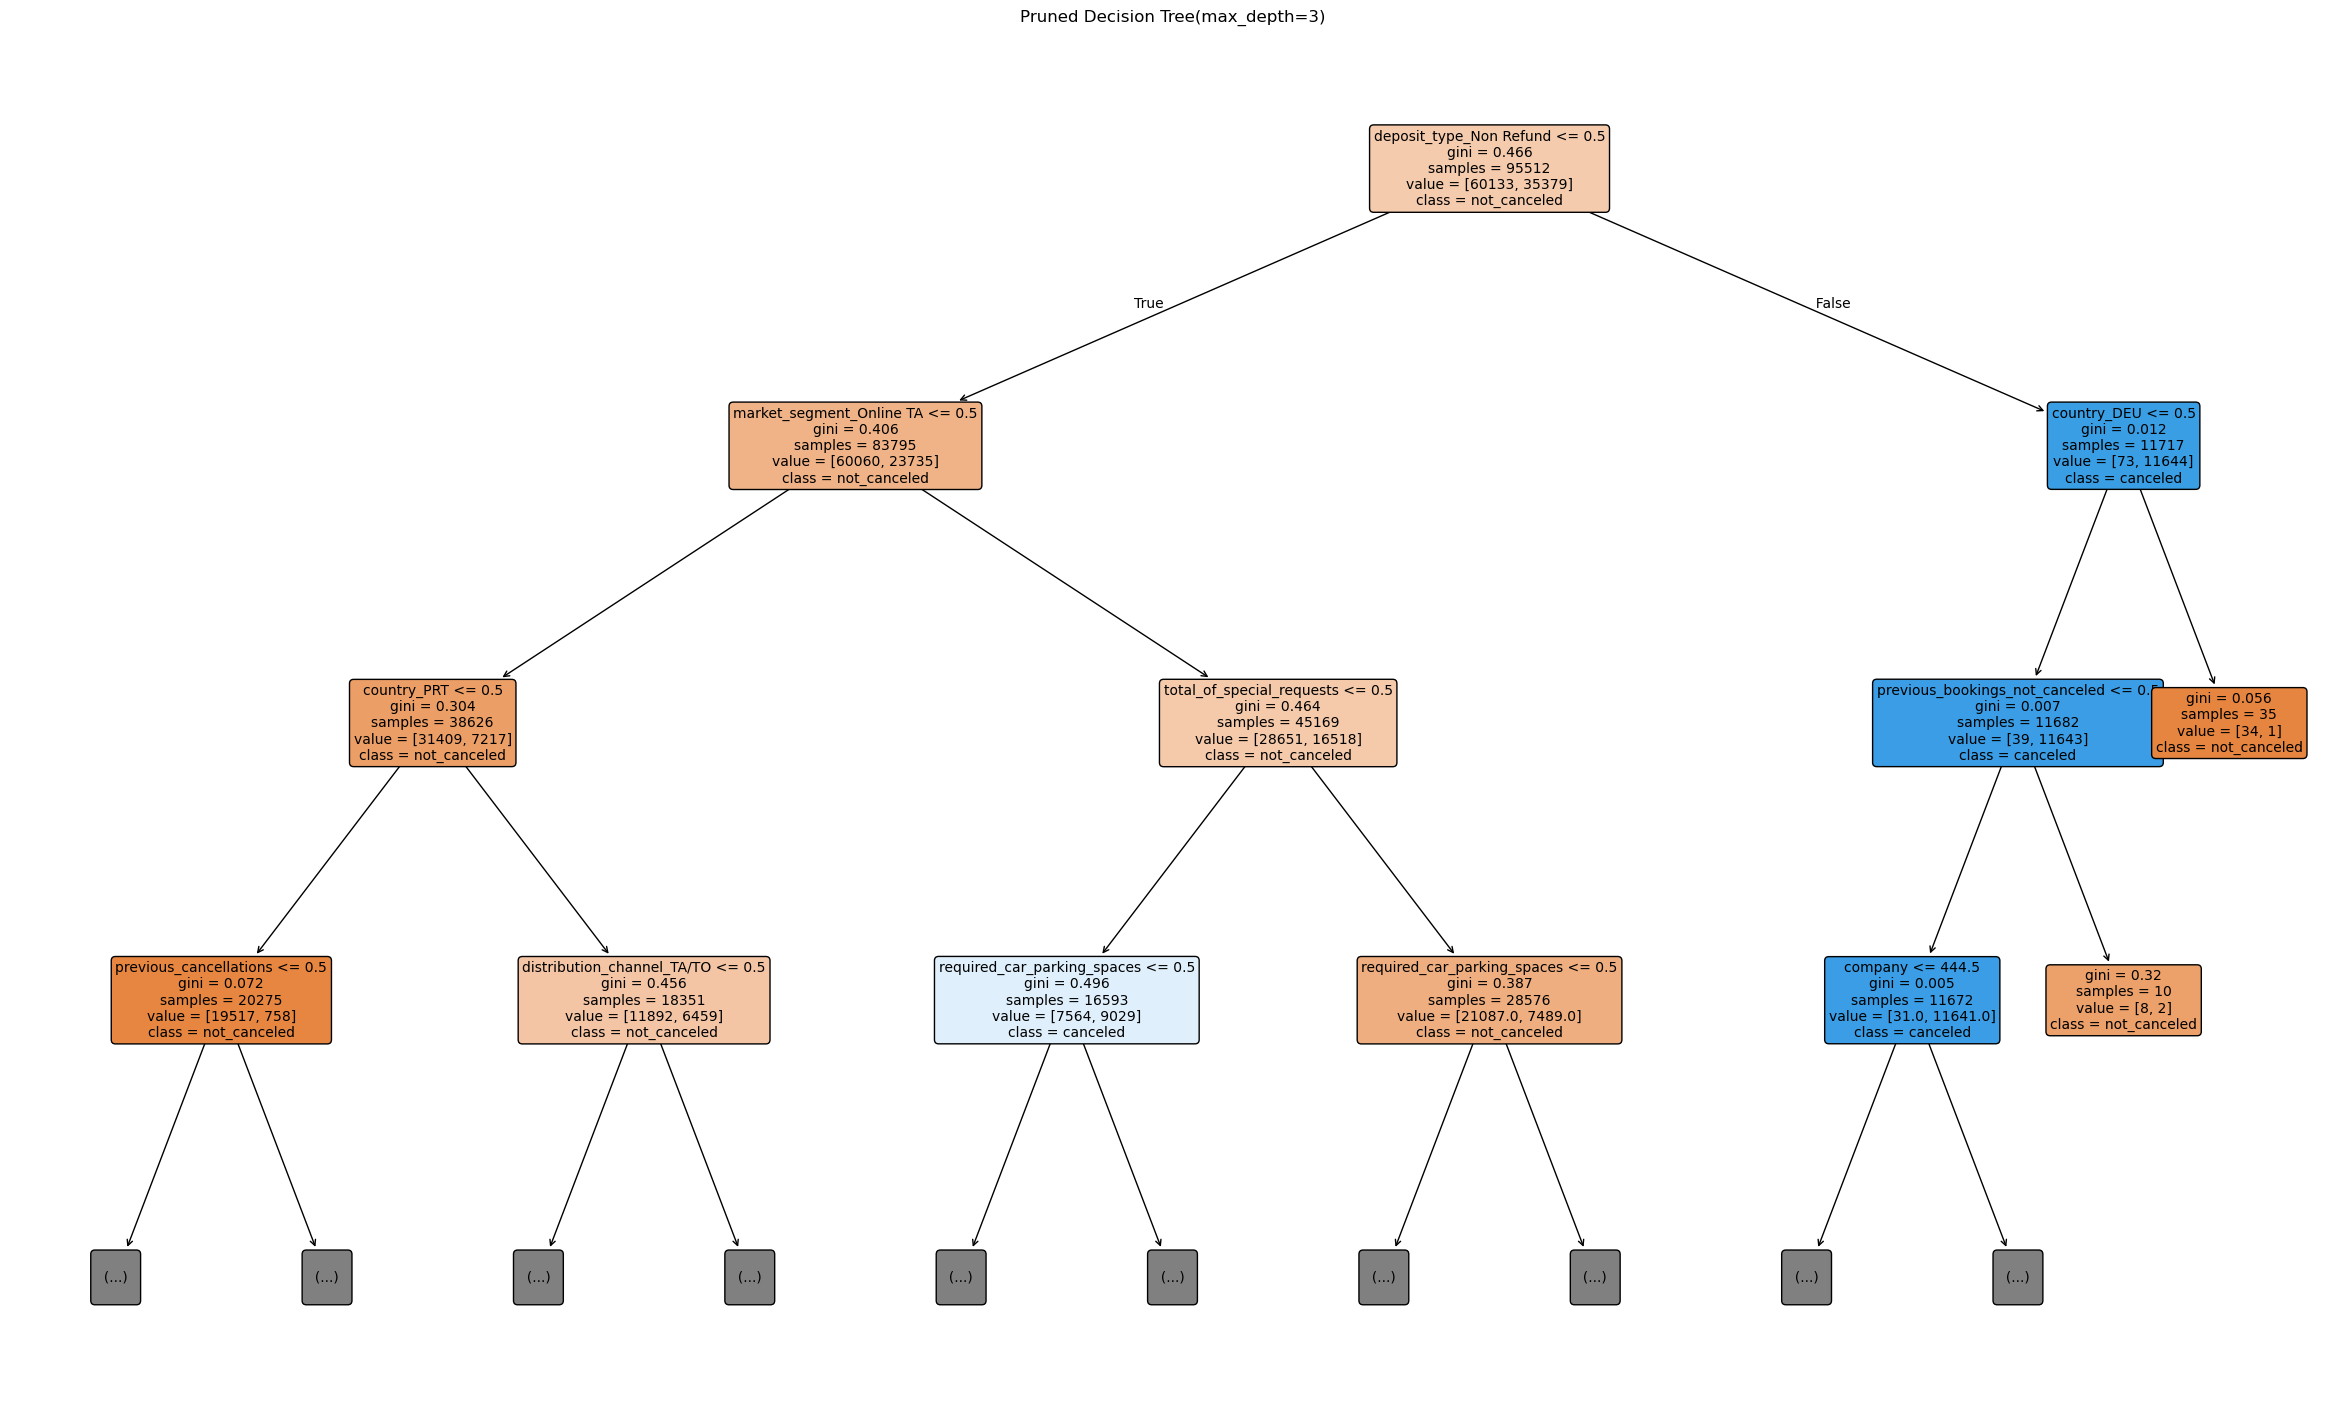

In [48]:
plt.figure(figsize=(30,18))


plot_tree(
    final_dt,
    feature_names=X_train.columns,
    class_names=["not_canceled", "canceled"],
    filled=True,
    rounded=True,
    max_depth=3,
    fontsize=10
)

os.makedirs("results", exist_ok=True)

plt.title("Pruned Decision Tree(max_depth=3)")
plt.savefig("results/decision_tree_pruned.png", dpi=300, bbox_inches="tight")
plt.show()


In [49]:
y_test_proba=final_dt.predict_proba(X_test)[:,1]

#ROC-AUC Score
roc_auc=roc_auc_score(y_test,y_test_proba)
print(f"ROC-AUC Score (Test Set): {roc_auc:.4f}")

ROC-AUC Score (Test Set): 0.9373


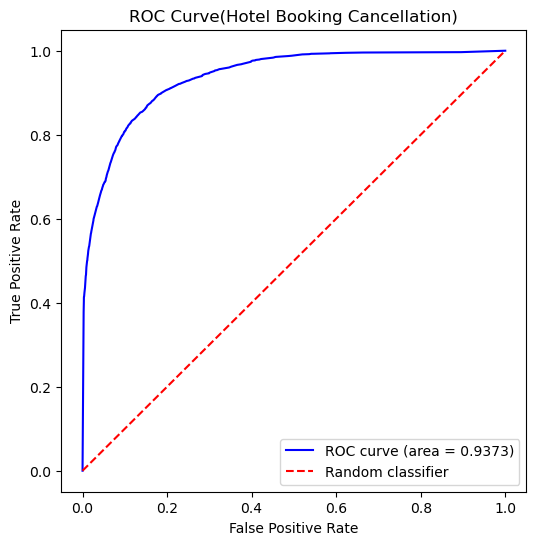

In [50]:
fpr,tpr, _= roc_curve(y_test, y_test_proba)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--',label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve(Hotel Booking Cancellation)')
plt.legend()
plt.show()

In [51]:
# Use the FINAL pruned model settings
dt_cv = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=best_alpha
)

# 5-fold cross-validation on the TRAINING set only
cv_scores = cross_val_score(
    dt_cv,
    X_train,
    y_train,
    cv=5,
    scoring='accuracy'
)

print("Cross-validation accuracies:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))
print("Std CV accuracy:", np.std(cv_scores))


Cross-validation accuracies: [0.8572999  0.86174946 0.86404565 0.86158517 0.85985761]
Mean CV accuracy: 0.8609075589010159
Std CV accuracy: 0.002242015986385753
